In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy
import palantir
# Plotting imports
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(101)


ModuleNotFoundError: No module named 'numpy'

In [ ]:
%matplotlib inline

: 

In [ ]:
week6_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week6")
week6_ad.var_names_make_unique()

week7_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week7")
week7_ad.var_names_make_unique()

week8_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week8")
week8_ad.var_names_make_unique()

week15_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week15")
week15_ad.var_names_make_unique()

week16_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week16")
week16_ad.var_names_make_unique()

week12_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week12/Male_Week_12_gene_matrix/")
week12_ad.var_names_make_unique()


: 

In [ ]:
week6_ad.var['mt'] = week6_ad.var_names.str.startswith('MT-')
week7_ad.var['mt'] = week7_ad.var_names.str.startswith('MT-')
week8_ad.var['mt'] = week8_ad.var_names.str.startswith('MT-')
week12_ad.var['mt'] = week12_ad.var_names.str.startswith('MT-')
week15_ad.var['mt'] = week15_ad.var_names.str.startswith('MT-')
week16_ad.var['mt'] = week16_ad.var_names.str.startswith('MT-')


: 

In [ ]:
sc.pp.calculate_qc_metrics(week6_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week7_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week8_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week12_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week15_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week16_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)

: 

In [ ]:
sc.pl.violin(week7_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
             

: 

In [ ]:
plt.hist(np.log10(week15_ad.obs['total_counts']), 50);

: 

In [ ]:
week8_ad.obs.head(n=10)


: 

In [ ]:
# Set the dataset identifier in both anndatas
week6_ad.obs['Dataset'] = 'week6'
week7_ad.obs['Dataset'] = 'week7'
week8_ad.obs['Dataset'] = 'week8'
week12_ad.obs['Dataset'] = 'week12'
week15_ad.obs['Dataset'] = 'week15'
week16_ad.obs['Dataset'] = 'week16'





: 

In [ ]:
emb_all = week6_ad.concatenate(week7_ad,week8_ad)

fet_all = week12_ad.concatenate(week15_ad,week16_ad)

both_all = week6_ad.concatenate(week7_ad,week8_ad, week12_ad, week15_ad, week16_ad)

: 

Without Batch Correction

In [ ]:
sc.pp.filter_genes(emb_all, min_cells=10)
sc.pp.normalize_total(emb_all)
sc.pp.log1p(emb_all)

sc.pp.filter_genes(fet_all, min_cells=10)
sc.pp.normalize_total(fet_all)
sc.pp.log1p(fet_all)


: 

In [ ]:
sc.pp.highly_variable_genes(emb_all)
sc.pp.pca(emb_all)

sc.pp.highly_variable_genes(fet_all)
sc.pp.pca(fet_all)

: 

In [ ]:
sc.pp.neighbors(emb_all)
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

: 

In [ ]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])

: 

Batch correction

In [ ]:
sc.external.pp.harmony_integrate(emb_all, key='Dataset')



: 

In [ ]:
emb_all.obs['leiden_no_correction'] = emb_all.obs['leiden']
emb_all.obsm['X_umap_no_correction'] = emb_all.obsm['X_umap']

: 

In [ ]:
sc.pp.neighbors(emb_all, use_rep='X_pca_harmony')
# UMAP and leiden use results from the neighborhood computation. Therefore we dont need to specify harmony
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

: 

In [ ]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])


: 

In [ ]:
sc.pl.scatter(emb_all, basis='umap_no_correction', color='leiden')

: 

In [ ]:
sc.pl.scatter(emb_all, basis='umap', color='leiden_no_correction')

: 

In [ ]:
sc.pp.neighbors(fet_all)
sc.tl.umap(fet_all)
sc.tl.leiden(fet_all)

: 

In [ ]:
sc.pl.umap(fet_all, color=['Dataset', 'leiden'])

: 

In [ ]:
sc.external.pp.harmony_integrate(fet_all, key='Dataset')

: 

In [ ]:
fet_all.obs['leiden_no_correction'] = fet_all.obs['leiden']
fet_all.obsm['X_umap_no_correction'] = fet_all.obsm['X_umap']

: 

In [ ]:
sc.pp.neighbors(fet_all, use_rep='X_pca_harmony')
# UMAP and leiden use results from the neighborhood computation. Therefore we dont need to specify harmony
sc.tl.umap(fet_all)
sc.tl.leiden(fet_all)

: 

In [ ]:
sc.pl.umap(fet_all, color=['Dataset', 'leiden'])

: 

In [ ]:
sc.pl.scatter(fet_all, basis='umap_no_correction', color='leiden')

: 

In [ ]:
sc.pl.scatter(fet_all, basis='umap', color='leiden_no_correction')

: 

In [ ]:
sc.pl.scatter(fet_all, basis='umap', color=['SOX9', 'AMH', 'VIM', 'CD68', 'CSF1'])

: 

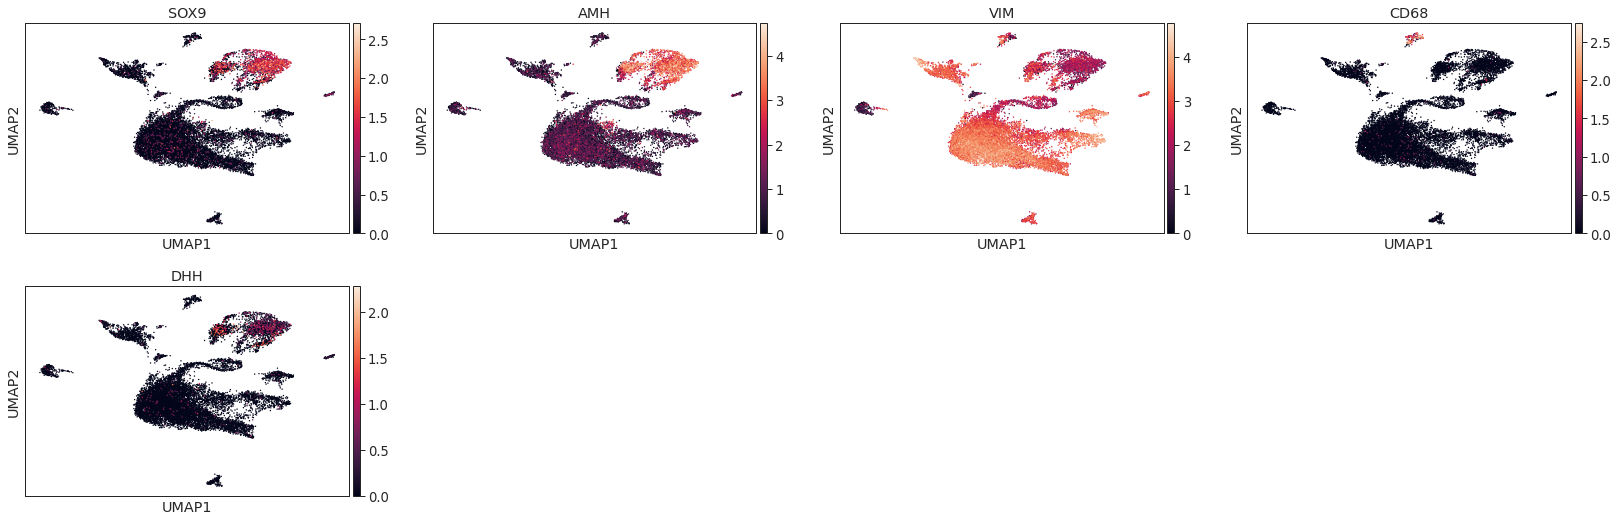

In [31]:
sc.pl.umap(emb_all, color=['SOX9', 'AMH', 'CD68', 'DHH'])
sc.pl.umap(fet_all, color=['SOX9', 'AMH', 'CD68', 'DHH'])

In [32]:
sc.pp.filter_genes(both_all, min_cells=10)
sc.pp.normalize_total(both_all)
sc.pp.log1p(both_all)

sc.pp.neighbors(both_all)
sc.tl.umap(both_all)
sc.tl.leiden(both_all)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [33]:
sc.external.pp.harmony_integrate(both_all, key='Dataset')



2022-06-26 19:08:05,390 - harmonypy - INFO - Iteration 1 of 10
2022-06-26 19:08:19,062 - harmonypy - INFO - Iteration 2 of 10
2022-06-26 19:08:33,263 - harmonypy - INFO - Iteration 3 of 10
2022-06-26 19:08:46,850 - harmonypy - INFO - Iteration 4 of 10
2022-06-26 19:08:59,864 - harmonypy - INFO - Iteration 5 of 10
2022-06-26 19:09:13,483 - harmonypy - INFO - Iteration 6 of 10
2022-06-26 19:09:25,757 - harmonypy - INFO - Iteration 7 of 10
2022-06-26 19:09:35,403 - harmonypy - INFO - Iteration 8 of 10
2022-06-26 19:09:42,320 - harmonypy - INFO - Iteration 9 of 10
2022-06-26 19:09:50,095 - harmonypy - INFO - Iteration 10 of 10
2022-06-26 19:10:03,858 - harmonypy - INFO - Stopped before convergence


https://nbviewer.org/github/dpeerlab/Palantir/blob/master/notebooks/Palantir_sample_notebook.ipynb

In [1]:
pca_projections = pd.DataFrame(fet_all.obsm['X_pca'], index=fet_all.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)




NameError: name 'pd' is not defined